---
## Give your presentation a title
title: "My Jupyter Notebook Presentation"
## Choose a reveal.js theme, options are available at https://revealjs.com/themes/
theme: "beige"
## Add a main CSS file
---
<!-- <link rel="stylesheet" type="text/css" href="{{ filename='main.css') }}"> -->
<!-- Import Bootstrap styles -->
<!-- <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css"> -->


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend= "plotly"
pd.set_option('display.max_columns', 150, 'display.max_rows', 100, 'display.max_colwidth', 15)
%matplotlib inline 

In [15]:
!jupyter nbconvert --to slides --no-input --post serve Anamoly_detection_credit_card.ipynb
#!jupyter nbconvert --to markdown --output mymarkdownfile.md Anamoly_detection_credit_card.ipynb
#!jupyter nbconvert --to slides --output mymarkdownfile.html Anamoly_detection_credit_card.ipynb
#!jupyter nbconvert --to slides --post serve Anamoly_detection_credit_card.ipynb
#!jupyter nbconvert --to slides --execute Anamoly_detection_credit_card.ipynb

[NbConvertApp] Converting notebook Anamoly_detection_credit_card.ipynb to slides
[NbConvertApp] Writing 1665625 bytes to Anamoly_detection_credit_card.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Anamoly_detection_credit_card.slides.html
Use Control-C to stop this server
^C

Interrupted


# What is PCA

PCA (Principal Component Analysis) is a technique to find a low-dimensional representation of a dataset that captures as much variation as possible. It seeks a small number of dimensions that are interesting and informative, where each dimension is a linear combination of the original features. The first principal component is a normalized linear combination of the features that has the largest variance. It can be found through an optimization problem, and the resulting loadings and scores make up the principal component loading vector. PCA is useful when the original dataset has a large number of features, making it difficult to visualize and analyze.

# Introduction 

* In the real world, fraud often goes undiscovered, and only the fraud that is caught provides any labels for the datasets. 

* Moreover, fraud patterns change over time, so supervised systems that are built using fraud labels become stale, capturing historical patterns of fraud but failing to adapt to newly emerging patterns.

* For these reasons (the lack of sufficient labels and the need to adapt to newly emerging patterns of fraud as quickly as possible), unsupervised learning fraud detection systems are in vogue.

* In this notebook, we will build such a solution using PCA 

In [4]:
# load dataset
df = pd.read_csv('/Users/waleedidrees/Dropbox/Python_Projects/books/handson-unsupervised-learning-master/datasets/credit_card_data/credit_card.csv').rename(columns= {"Class":"target"})
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns= df.columns.str.lower()
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Disable the warnings

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## we see that fraudulent transactions are very rare and this makes the data very imbalanced

In [8]:
df["target"].value_counts().reset_index()

,index,target
0,0,284315
1,1,492


we have 284,807 credit card transactions in total, of which 492 are fraudulent, with a positive (fraud) label of one. The rest are normal transactions, with a negative (not fraud) label of zero.
We have 30 features to use for anomaly detection—time, amount, and 28 principal components. And, we will split the dataset into a training set (with 190,820 transactions and 330 cases of fraud) and a test set
(with the remaining 93,987 transactions and 162 cases of fraud)

In [9]:
(
df["target"]
.value_counts()
.reset_index()
.plot.bar(x="index", y= "target", color="index", height= 800, width= 800)
 )

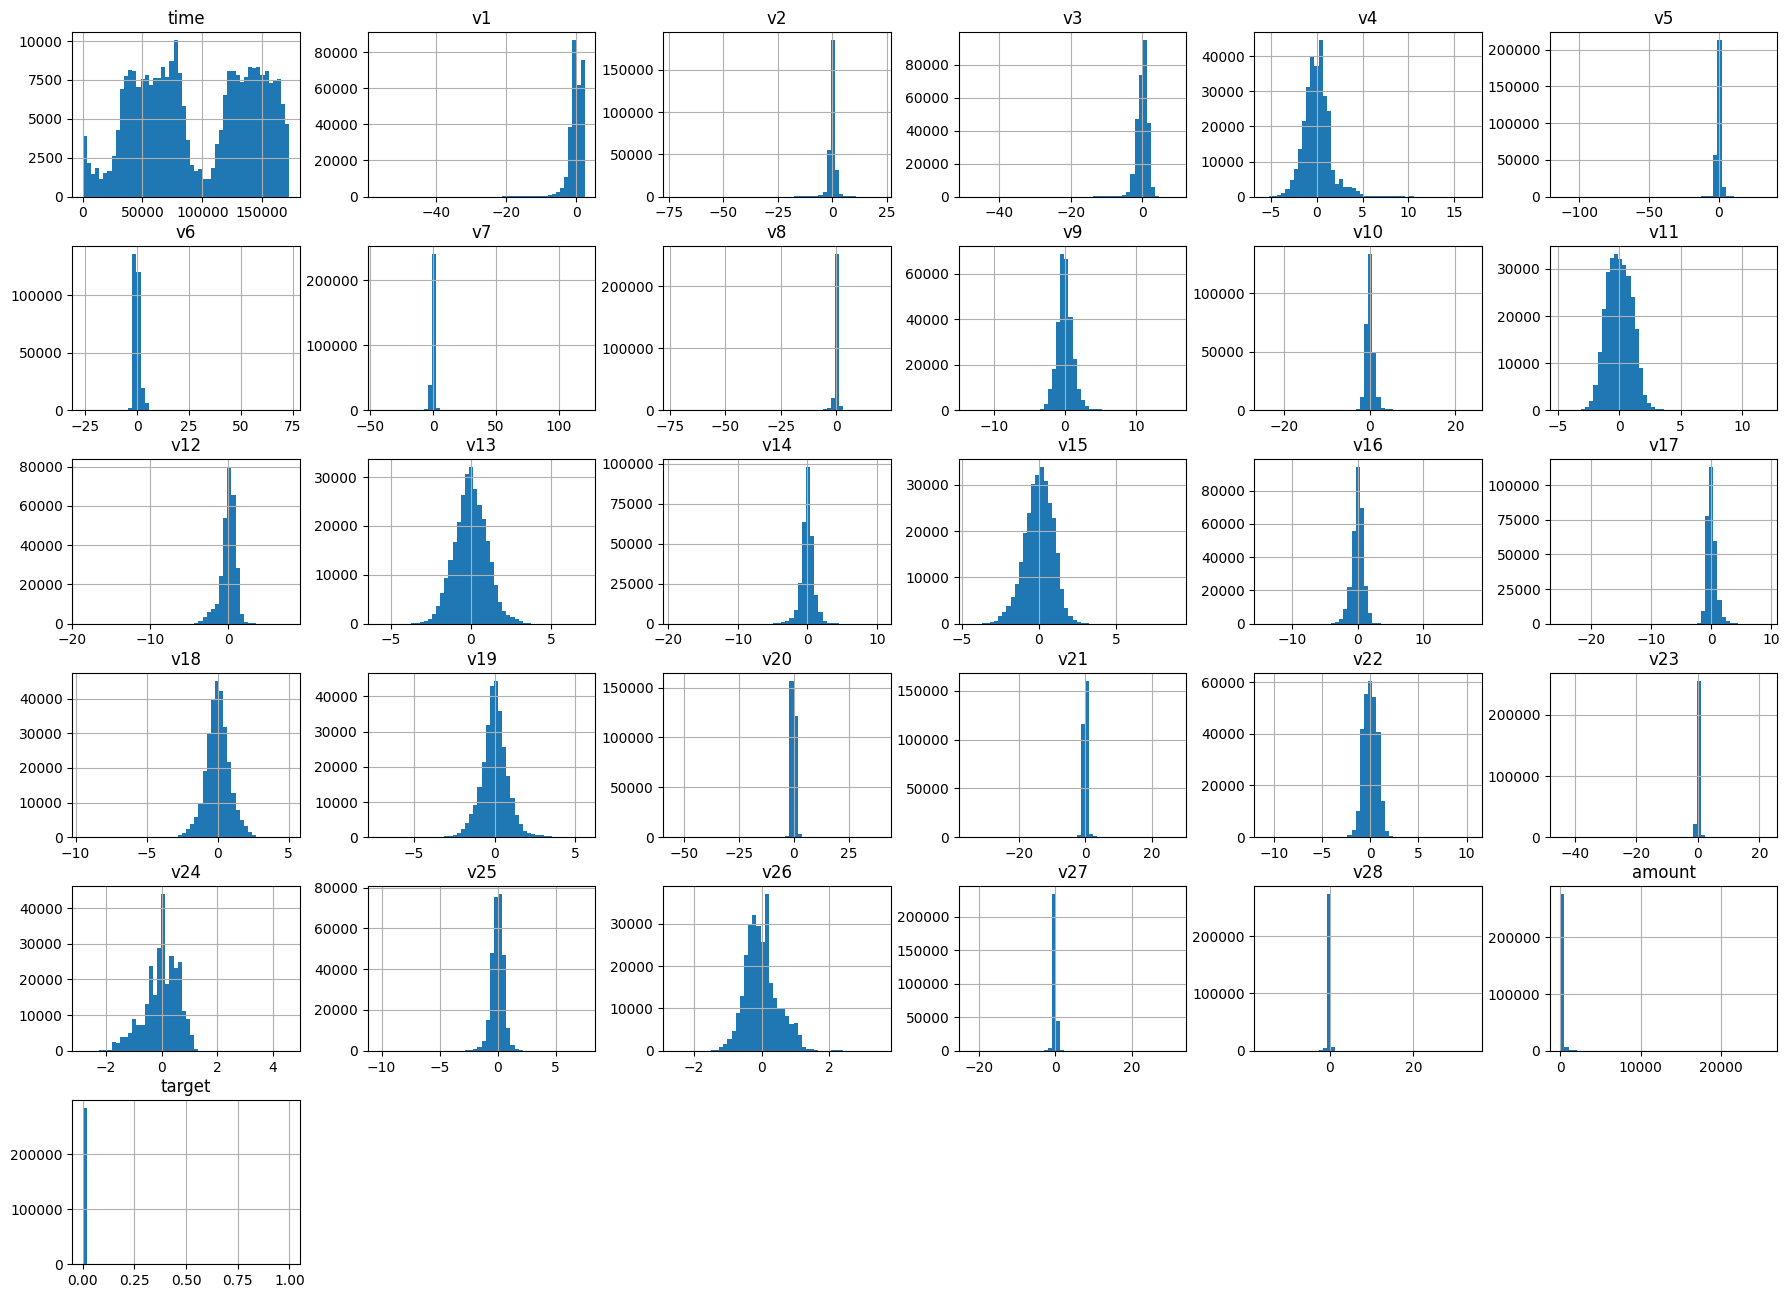

In [10]:
pd.options.plotting.backend = "matplotlib"

df.hist(figsize= (22,16), bins=50)

pd.options.plotting.backend = "plotly"

## Methodology

Since this an unsupervised learning problem and we will not be using the labels so we need find a way to measure the performance of the anamoly model.  Dimensionality reduction algorithms reduce the dimensionality of data while attempting to minimize the reconstruction error. However, these dimensionality reduction algorithms cannot capture all the information of the original features as they move to a lower dimensional space; therefore, there will be some error as these algorithms reconstruct the reduced feature set back to the original number of dimensions.
we will use these errors and make a function to compare them to the original dataframe and measure the score. 
we make our performance measure as follows:

* We take the difference between the original vs the pca dataframe which we created from pcs components using inverse transformation
* then we transform the difference using min max scaller from 0 to 1 scale
* we can consider this score as probability score and use this against the labels to calculate, precision, recall and threshhold using sklearn precision recall curve metric. 
* We will take x number of highest scores as our anomolies
* we can all also calculate average precision score using the average precision score metric.

# Define evaluation functions

In [11]:
# Calculate reconstruction error
def anomalyScores(originalDF, pca_df):
    loss = ((originalDF.values- pca_df.values)**2).sum(axis=1)    
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

# Train-test splits
We will remove the target variable and we will not be using it for training but we will use it to evaluate the anamolies by attaching it to anamoly scores

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(df.drop(columns=["target", "time"]).copy(), df["target"], test_size = 0.33,stratify=df["target"],  random_state = 2018 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((190820, 29), (190820,), (93987, 29), (93987,))

The train data has 330 Fraudulent transaction and 190490 normal transactions

In [13]:
y_train.value_counts()

0    190490
1       330
Name: target, dtype: int64

# Lets create Preprocessing Pipiline
* all our variables are numeric we will standardise data and then as for PCA we must standardise observations.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

In [15]:
num_pipe= Pipeline ( steps=[
    ("std", StandardScaler()),
    ("impute", KNNImputer()), 
    ])

In [16]:
all_cols= X_train.columns
prep= ColumnTransformer([
    ("n", num_pipe, all_cols)
    ]).set_output(transform= "pandas")
prep.fit_transform(X_train).head()

,n__v1,n__v2,n__v3,n__v4,n__v5,n__v6,n__v7,n__v8,n__v9,n__v10,n__v11,n__v12,n__v13,n__v14,n__v15,n__v16,n__v17,n__v18,n__v19,n__v20,n__v21,n__v22,n__v23,n__v24,n__v25,n__v26,n__v27,n__v28,n__amount
142087,-1.008613,1.168013,0.203077,-0.252933,-0.387030,-0.051340,-0.191393,0.917626,-0.220348,0.379391,0.891953,0.652099,-0.481673,0.888920,0.511094,0.459652,-0.178769,-0.131099,-0.030699,0.240351,-0.230649,-0.781406,0.154163,-0.584578,-0.161870,0.232116,0.525621,0.459397,-0.301324
165168,0.071848,0.664025,-0.240845,-0.381091,0.694608,-0.633906,0.833474,-0.132701,-0.166967,-0.793682,-0.490992,0.366808,0.879055,-1.245368,-0.369767,0.316392,0.393419,-0.407275,-0.310150,0.099453,-0.438520,-1.037593,0.145573,1.078771,-0.761303,0.221753,0.564899,0.254973,-0.342346
235908,0.099163,-0.387383,-0.945009,-1.493663,-0.092322,-0.878326,1.252531,-0.564372,-2.760963,0.979945,-0.734286,-0.940293,0.749094,0.176712,-1.084605,-2.049873,1.119388,-0.424709,0.039325,0.136822,0.597949,2.047828,0.533608,1.885871,-0.949325,0.195840,0.394576,0.789716,0.507010
148255,0.015486,0.519611,0.193472,-0.418969,0.316777,-0.774851,0.816615,-0.154107,-0.060485,-0.393037,-0.838072,0.229399,0.138905,0.095691,-0.404080,-0.180757,-0.428453,-1.022053,-0.193808,-0.038190,-0.336778,-0.738483,0.127711,-0.026519,-0.955999,0.297594,0.620507,0.285961,-0.333753
145672,0.009053,0.524138,0.175338,-0.335413,0.761346,0.501074,0.266188,0.187765,-0.186259,-0.837330,0.231244,0.693028,1.261985,-1.542311,-0.324732,1.234117,-0.316896,1.377317,0.854111,0.109213,-0.199423,-0.454902,0.047231,-0.725277,-2.181428,-0.147735,0.586351,0.739459,-0.337806


# Lets define Evaluation Function to measure the recall, precision and roc_auc score

In [17]:
# Evaluation Functions
from sklearn.metrics import accuracy_score, recall_score ,average_precision_score, precision_recall_curve, precision_score, roc_auc_score,roc_curve, auc 
def eval_scores(actuals, pred):
    res= pd.DataFrame({ 
    "accuracy": [accuracy_score(actuals, pred)], 
    "recall": [recall_score(actuals, pred)],
    "roc_auc": [roc_auc_score(actuals, pred)],
    "precision": [precision_score(actuals, pred)]})    
    return res

In [18]:
'''TensorFlow and Keras'''
import tensorflow as tf
from tensorflow import keras
K = keras.backend
import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy
from scikeras.wrappers import KerasRegressor

tf.config.set_visible_devices([], 'GPU')

In [63]:
def create_model():
    # create model
    # Call neural network API
    model = Sequential()
    # Apply linear activation function to input layer
    # Generate hidden layer with 29 nodes, the same as the input layer
    model.add(Dense(units=29, activation='linear',input_dim=29))    
    model.add(Dense(units=27, activation='linear'))
    #model.add(Dropout(0.02))
    #model.add(Dense(units=10, activation='linear'))    
    # Apply linear activation function to hidden layer
    # Generate output layer with 29 nodes    
    model.add(Dense(units=29, activation='linear'))
    # Compile the model
    model.compile(optimizer= 'adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

In [49]:
# df_X = prep.fit_transform(df.drop(columns=["target", "time"]).copy())
# df_y= df["target"]
df_X = prep.fit_transform(X_train)
df_y= y_train

# Define our PCA model pipeline and see if it works fine with custom Transformer 

In [50]:
model= create_model()
history = model.fit(x=df_X, y=df_X,
                    epochs= 100,
                    batch_size= 2000,
                    shuffle=True,
                    validation_data=(df_X, df_X),
                    verbose=1)

Epoch 1/100
96/96 [==============================] - 0s 3ms/step - loss: 1.0264 - accuracy: 0.1707 - val_loss: 0.5942 - val_accuracy: 0.3232
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.4177 - val_loss: 0.3506 - val_accuracy: 0.5014
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.5551 - val_loss: 0.2304 - val_accuracy: 0.5979
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.6321 - val_loss: 0.1657 - val_accuracy: 0.6642
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1389 - accuracy: 0.7013 - val_loss: 0.1144 - val_accuracy: 0.7338
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.7475 - val_loss: 0.0960 - val_accuracy: 0.7558
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.7674 - val_loss: 0.0682 - val_accuracy: 0.7821
Epoch 8/100
9

5964/5964 [==============================] - 2s 303us/step


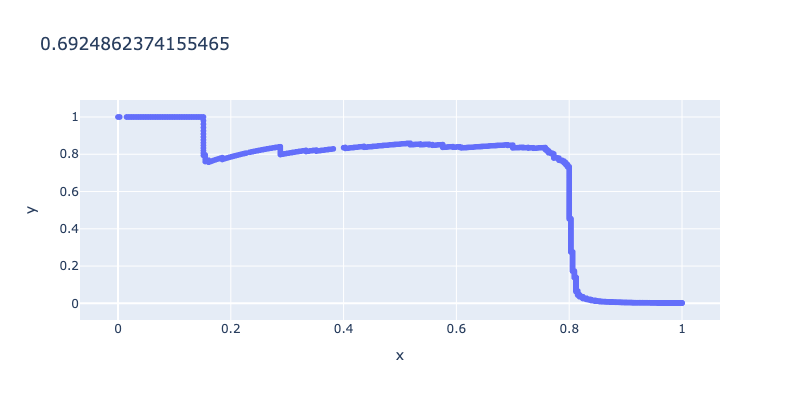

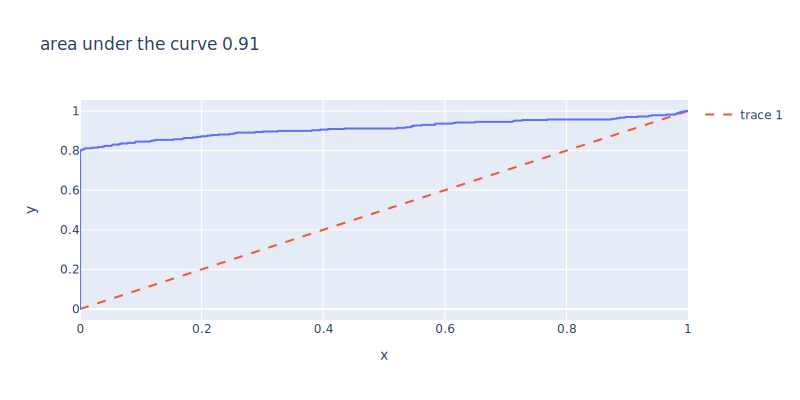

In [51]:
def plots_(labels, data):
    df_pred= pd.DataFrame(model.predict(data), columns=prep.get_feature_names_out())
    preds= pd.DataFrame()
    scores=anomalyScores(data, df_pred)   
    preds= pd.concat([labels, scores], axis=1)   
    preds.columns = ['trueLabel', 'anomalyScore']   
    precision, recall, thresholds =  precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision =  average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    fpr,tpr,thresholds = roc_curve(preds['trueLabel'], preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)   
    px.scatter( x=recall, y= precision, render_mode='webgl', title=average_precision, width= 800, height=400).show("png")
    (px.line(x=fpr, y=tpr, title = f'area under the curve {round(areaUnderROC,2)}', width=800, height= 400)
    .add_scatter(y=[0,1], mode="lines", line_dash= "dash")  
    ).show("svg")
plots_(df_y, df_X)

In [52]:
model.summary()
#model.get_layer('dense_1').output

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 29)                870       
                                                                 
 dense_13 (Dense)            (None, 27)                810       
                                                                 
 dense_14 (Dense)            (None, 29)                812       
                                                                 
Total params: 2,492
Trainable params: 2,492
Non-trainable params: 0
_________________________________________________________________


2938/2938 [==============================] - 1s 319us/step


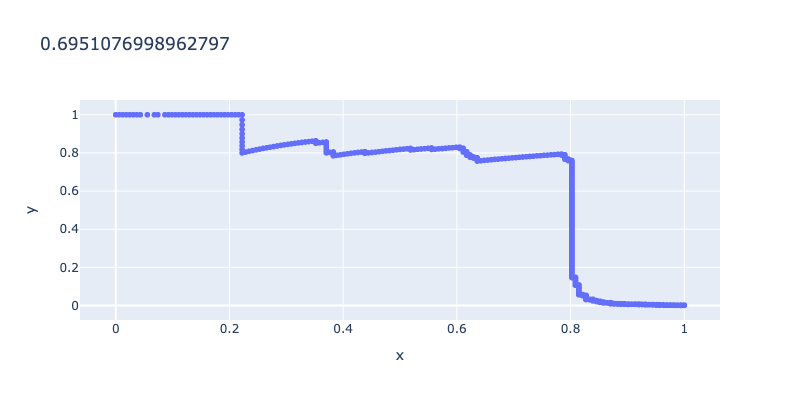

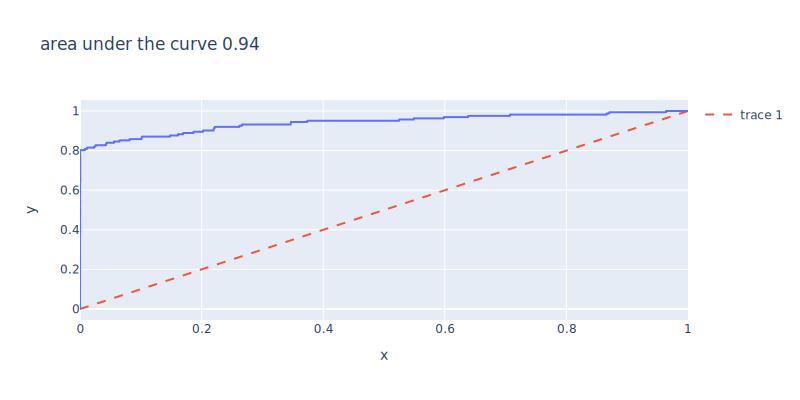

In [53]:
df_X = prep.fit_transform(X_test)
df_y= y_test
plots_(df_y, df_X)

* we can see from the Score above that 27 PCA components are the solution for this model and the Recall is .79 and precision is .74 with roc_auc of almost 0.9

In [54]:
layer_name = 'dense_1'
#layer_name = 'hidden_layer'
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
intermediate_output_train = intermediate_layer_model.predict(df_X)
pd.DataFrame(intermediate_output_train, index= df_X.index)

ValueError: No such layer: dense_1. Existing layers are: ['dense_12', 'dense_13', 'dense_14'].

In [64]:
#from sklearn import 
model= KerasRegressor(create_model(), optimizer=tf.keras.optimizers.Adam(), epochs= 10, batch_size= 2000, shuffle=True,  verbose=1)
pipe= Pipeline(steps=[
    ("preprocess", prep),    
    ('model', model)        
    ]).set_output(transform="pandas")
pipe.fit(X_train,X_train)

Epoch 1/10
96/96 [==============================] - 0s 1ms/step - loss: 2290.2605 - accuracy: 0.2633
Epoch 2/10
96/96 [==============================] - 0s 2ms/step - loss: 1711.9081 - accuracy: 0.4988
Epoch 3/10
96/96 [==============================] - 0s 2ms/step - loss: 570.5257 - accuracy: 0.5807
Epoch 4/10
96/96 [==============================] - 0s 2ms/step - loss: 127.3244 - accuracy: 0.6943
Epoch 5/10
96/96 [==============================] - 0s 2ms/step - loss: 79.3630 - accuracy: 0.7922
Epoch 6/10
96/96 [==============================] - 0s 2ms/step - loss: 72.6779 - accuracy: 0.8056
Epoch 7/10
96/96 [==============================] - 0s 2ms/step - loss: 68.9867 - accuracy: 0.8054
Epoch 8/10
96/96 [==============================] - 0s 2ms/step - loss: 66.2780 - accuracy: 0.8076
Epoch 9/10
96/96 [==============================] - 0s 2ms/step - loss: 63.1189 - accuracy: 0.8078
Epoch 10/10
96/96 [==============================] - 0s 2ms/step - loss: 60.1195 - accuracy: 0.8097


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('n',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   KNNImputer())]),
                                                  Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'],
      dtype='object'))])),
                ('model',
                 KerasRegressor(batch_size=2000, epochs=10, model=<keras.engine.sequential.Sequential object at 0x2f358ee60>, optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x2f358ead0>))])

In [60]:
from scipy.stats import randint, uniform, norm,reciprocal, expon
reciprocal.rvs(20, 200000), expon.rvs(scale=1.0)
# loc is lower bound value and scale is the +2 range and size is number of observations 
uniform.rvs(loc=5, scale=2, size= 10),randint.rvs(low=20, high=70, size=10),norm.rvs(0.1, 1)
# use randint.rvs(1,4) and uniform.rvs to see output values
grid_epoch = randint(10,20)


In [70]:
MLA_params = {                            
        "model__epochs": [10,12],
        #"model__optimizer": ["Adam"]
        } 

># Random/GridSearch Cross Validation
># CV split

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
cv_split = KFold(n_splits= 2, random_state=10 , shuffle=True)

grid_cv= GridSearchCV(
        pipe, 
        param_grid= MLA_params,        
        cv= cv_split,        
        #scoring='neg_mean_squared_error',
        #n_iter = 1,
        verbose= 0,         
        #random_state=42,
        n_jobs= -1 )

tune_grid =grid_cv.fit(X_train, X_train)   
    

INFO:tensorflow:Assets written to: ram://4c4b8c6028ba4bee91ee38247cc25b34/assets


2023-03-13 19:22:16.991885: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ram://f2c80bf9704e45c1aae154d451dddc97: INVALID_ARGUMENT: ram://f2c80bf9704e45c1aae154d451dddc97 is a directory.


AttributeError: 'Adam' object has no attribute 'build'

In [ ]:
#eval_scores(y_train, preds )

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_train, pipe.predict(X_train), labels= y_train.unique())
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= y_train.unique())
# disp.plot()
# plt.show()

* This results is impressive considering its a unsupervised model we managed to etect 261 out of 330 fraudulent transactions.